# Example of match data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
PLAYER_SID = 1572500566 # MDZ_Jimmy

file_name = f"player_{PLAYER_SID}_sf6_matches.xlsx"

In [3]:
data = pd.read_excel(file_name)
data["left_side"] = data["left_side"].map({0: "Right side", 1: "Left Side"})

last_day = data["uploaded_at"].max().date()

df_last_session = data[data["uploaded_at"].map(lambda d: str(d.date()) == str(last_day))]
data.head(n=5)

,main_player_name,main_player_sid,main_player_character,main_player_score,main_player_league_rank,main_player_lp,main_player_mr,main_player_mr_ranking,main_player_input_type,main_player_platform,opposite_player_name,opposite_player_sid,opposite_player_character,opposite_player_score,opposite_player_league_rank,opposite_player_lp,opposite_player_mr,opposite_player_mr_ranking,opposite_player_input_type,opposite_player_platform,match_won,left_side,uploaded_at,replay_id,replay_battle_type_name
0,MDZ_jimmY,1572500566,Ryu,2,36,378453,1740,3358,0,Steam,II az II,2546977177,Jamie,0,36,270670,1731,3358,0,Steam,1,Left Side,2025-02-16 20:12:42,M8RQYPBMQ,Ranked Match
1,MDZ_jimmY,1572500566,Ryu,2,36,378403,1732,3679,0,Steam,Courage,4218225016,Lily,0,36,322018,1713,3679,0,CrossPlatform,1,Left Side,2025-02-16 20:09:34,CU4MCCUQB,Ranked Match
2,MDZ_jimmY,1572500566,Ryu,2,36,378353,1724,4043,0,Steam,Courage,4218225016,Lily,0,36,322058,1721,4043,0,CrossPlatform,1,Left Side,2025-02-16 20:08:13,WFGBM8E9H,Ranked Match
3,MDZ_jimmY,1572500566,Ryu,0,36,378393,1730,3756,0,Steam,Saitama,3230943766,Guile,2,36,372657,1831,3756,0,CrossPlatform,0,Right side,2025-02-16 20:05:22,BAL46XLQK,Ranked Match
4,MDZ_jimmY,1572500566,Ryu,2,36,378343,1719,4343,0,Steam,Saitama,3230943766,Guile,0,36,372697,1842,4343,0,CrossPlatform,1,Right side,2025-02-16 20:03:35,TYBCQRB8E,Ranked Match


In [4]:
def match_reports(df):
    
    sep = "\n" + 20 * "-" + "\n"
    
    print("Number of matches:", len(df), end=sep)
    
    pie_chart_format_high = lambda x: f"{round(x / 100 * len(df))}"
    pie_chart_format_low = lambda x: f"{round(x / 100 * len(df))} ({round(x, 2)} %)"
    
    
    
    for col in ["match_won", "replay_battle_type_name", "opposite_player_character", "left_side"]:
        pie_chart_format = pie_chart_format_high if col == "opposite_player_character" else pie_chart_format_low
        plt.figure()
        df[col].value_counts().plot.pie(
            autopct=pie_chart_format,
            figsize=(8, 6)
        )
        plt.title(col)
        plt.ylabel(None)
        
    print("% of match won", round(df["match_won"].mean() * 100, 2), "%", end=sep)
    print(df[["left_side", "match_won"]].groupby("left_side").mean(), end=sep)
    print(df[["opposite_player_character", "match_won"]].groupby("opposite_player_character").mean(), end=sep)
    
    print("Highest MR", df['main_player_mr'].max(), end=sep)
    print("Highest World Ranking", df['main_player_mr_ranking'].min(), end=sep)

    highest_winstreak = max(len(seq) for seq in "".join(df["match_won"].map(str)).split("0"))

    print("Highest winstreak (assuming no gap in match saved):", highest_winstreak, end=sep)
    
    df_ranked = df[df["replay_battle_type_name"] == "Ranked Match"]

    plt.figure(figsize=(8, 6))

    plt.plot(df_ranked["main_player_mr"], label="Main Player MR")
    plt.plot(df_ranked["opposite_player_mr"], label="Opposite Player MR")

    plt.grid(True)
    plt.legend()
    plt.xlabel("Match")
    plt.ylabel("MR")
    plt.title("Ranked matches MR Evolution")

## Latest session stats

Number of matches: 58
--------------------
% of match won 62.07 %
--------------------
            match_won
left_side            
Left Side    0.777778
Right side   0.550000
--------------------
                           match_won
opposite_player_character           
A.K.I.                      0.200000
Akuma                       0.000000
Cammy                       1.000000
Chun-Li                     1.000000
Edmond Honda                1.000000
Guile                       0.333333
JP                          0.500000
Jamie                       0.666667
Juri                        0.666667
Ken                         1.000000
Kimberly                    0.571429
Lily                        0.714286
Luke                        1.000000
M. Bison                    1.000000
Mai                         0.600000
Manon                       0.000000
Zangief                     1.000000
--------------------
Highest MR 1764
--------------------
Highest World Ranking 2479
----------------

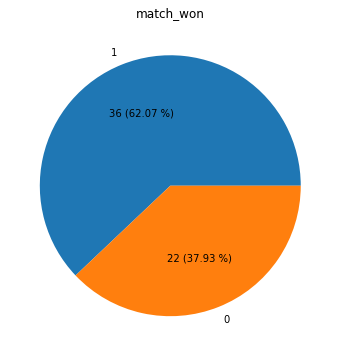

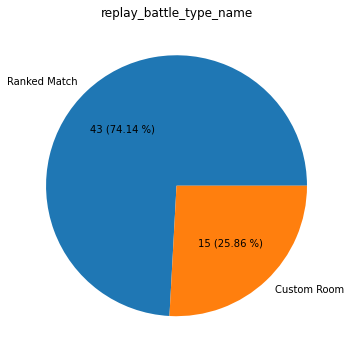

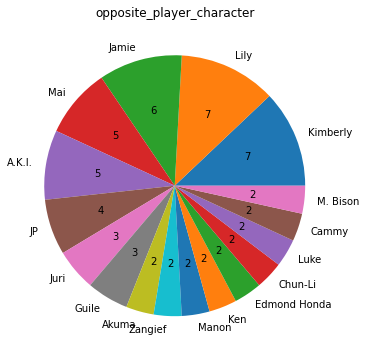

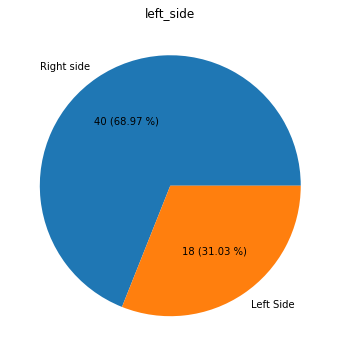

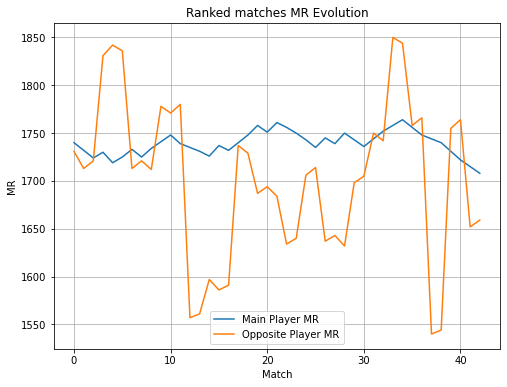

In [5]:
match_reports(df_last_session)

## Total matches stats

Number of matches: 130
--------------------
% of match won 53.85 %
--------------------
            match_won
left_side            
Left Side    0.595745
Right side   0.506024
--------------------
                           match_won
opposite_player_character           
A.K.I.                      0.142857
Akuma                       0.428571
Cammy                       0.500000
Chun-Li                     1.000000
Dee Jay                     0.333333
Dhalsim                     0.454545
Ed                          0.000000
Edmond Honda                0.571429
Guile                       0.333333
JP                          0.500000
Jamie                       0.500000
Juri                        0.666667
Ken                         0.857143
Kimberly                    0.444444
Lily                        0.714286
Luke                        1.000000
M. Bison                    1.000000
Mai                         0.714286
Manon                       0.000000
Marisa                    

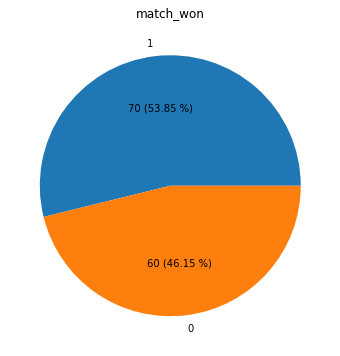

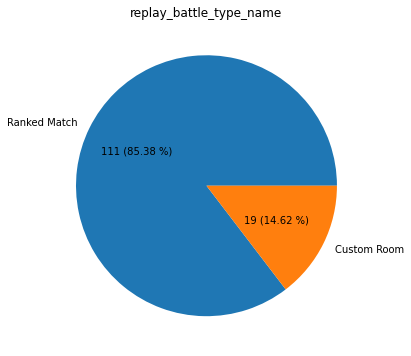

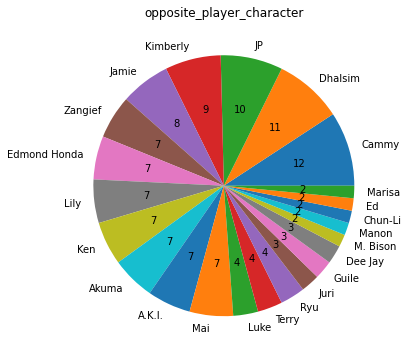

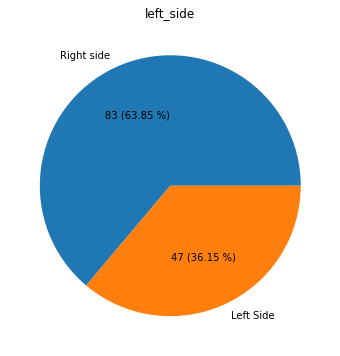

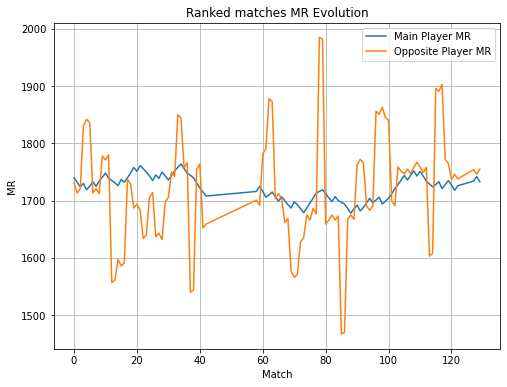

In [6]:
match_reports(data)